In [2]:
import pandas as pd
# CSV 파일 불러오기
df = pd.read_csv('tested.csv')
# 데이터 상위 5개 행 확인
print(df.head())
# 데이터의 기본 정보 확인 (컬럼, 데이터 타입, null 값 등)
print(df.info())
# 1. 데이터 로드 및 기본 정보 확인
# CSV 파일 불러오기


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [3]:
# 피처 추출 (독립변수 확인해보기)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# 데이터프레임의 상위 5개 행을 출력하여 데이터의 기본 구조를 확인하시오.
# (빈칸: df.______())
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Family_Size
0     253
1      74
2      57
3      14
4       7
6       4
10      4
5       3
7       2
Name: count, dtype: int64


<Axes: >

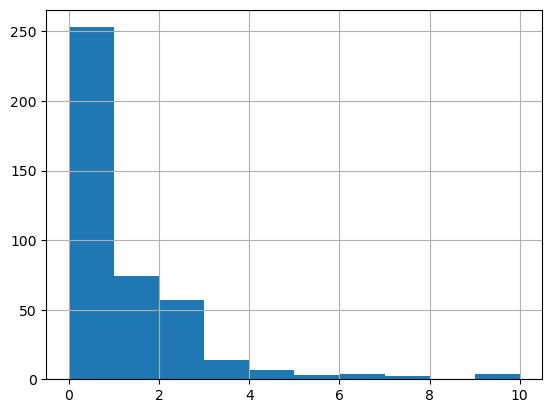

In [5]:
# 2. 피처 엔지니어링 1: 가족 수 변수 생성
# SibSp (형제자매 / 배우자 수) + Parch (부모 / 자녀 수) 값을 더하여 새로운 가족 수 변수를 만드시오.
# 변수 이름은 'Family_Size'로 지정하세요.

# Family_Size 변수의 분포를 확인하고, 전체적인 분포가 어떤지 설명하시오.
# SibSp와 Parch를 더하여 Family_Size 변수 생성
df['Family_Size'] = df['SibSp'] + df['Parch']

# Family_Size 변수의 분포 확인
print(df['Family_Size'].value_counts())

# Family_Size의 히스토그램을 그려 분포를 시각화
df['Family_Size'].hist(bins=10)


In [6]:
# 3. 피처 엔지니어링 2: 이름에서 호칭 추출
# 이름(`Name`)에서 Mr, Mrs, Miss 등 호칭을 추출하여 새로운 'Title' 변수를 생성하세요.
# 힌트: 이름 문자열에서 콤마(,)와 점(.) 사이의 텍스트를 추출하면 됨.
# (빈칸: df['Title'] = df['Name'].str.extract('_____', expand=False))

# 생성된 Title 변수의 상위 5개 값을 출력하고, 다양한 호칭이 어떻게 구성되어 있는지 확인하세요.
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Title 변수의 상위 5개 값 출력
print(df['Title'].head())

# Title 변수의 고유 값과 각 값의 빈도 확인
print(df['Title'].value_counts())

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/var/folders/1_/1w14611n7zj6b7_3h1l8lqm80000gn/T/ipykernel_10088/2171047462.py:7: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [7]:
# 4. 피처 엔지니어링 3: 나이 그룹화
# Age 변수의 결측값을 중간값으로 채우고, 나이 범주를 나눠서 'Age_Group' 변수를 생성하세요.
# 예: 0-12 (Child), 13-18 (Teenager), 19-35 (Young_Adult), 36-60 (Adult), 60 이상 (Senior)
# (빈칸: df['Age'] = df['Age'].fillna(df['______.median()']))

# 나이를 그룹화하는 함수 작성


# age_group 함수를 사용하여 새로운 'Age_Group' 변수 생성
# (빈칸: df['Age_Group'] = df['Age'].apply(____))

# 생성된 Age_Group 변수의 분포를 확인하세요.
# (빈칸: print(df['______'].value_counts()))
# Age 변수의 결측값을 중앙값으로 채우기
df['Age'] = df['Age'].fillna(df['Age'].median())

# 나이를 그룹화하는 함수 작성
def age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 35:
        return 'Young_Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

# age_group 함수를 사용하여 새로운 'Age_Group' 변수 생성
df['Age_Group'] = df['Age'].apply(age_group)

# Age_Group 변수의 분포 확인
print(df['Age_Group'].value_counts())


Age_Group
Young_Adult    259
Adult           94
Teenager        29
Child           25
Senior          11
Name: count, dtype: int64


In [8]:
# 5. 피처 엔지니어링 4: 요금 범주화
# Fare 변수를 기준으로 값이 높은 승객과 낮은 승객을 구분하기 위해 4개의 구간으로 나누어 'Fare_Bin' 변수를 생성하세요.
# 힌트: pd.qcut() 함수를 사용하여 구간 나누기
# (빈칸: df['Fare_Bin'] = pd.qcut(df['____'], _____))

# Fare_Bin 변수의 빈도를 출력하고, 값의 분포를 확인하세요.
# (빈칸: print(df['______'].value_counts()))
# Fare 변수를 4개의 구간으로 나누어 Fare_Bin 변수 생성
df['Fare_Bin'] = pd.qcut(df['Fare'], 4)

# Fare_Bin 변수의 빈도 확인
print(df['Fare_Bin'].value_counts())


Fare_Bin
(-0.001, 7.896]    114
(14.454, 31.5]     105
(31.5, 512.329]    102
(7.896, 14.454]     96
Name: count, dtype: int64


In [11]:
# 6. 피처 엔지니어링 5: 객실 여부
# Cabin 변수가 결측인 경우와 아닌 경우를 구분하여 'Cabin_Known' 변수를 생성하세요.
# Cabin 값이 존재하면 1, 결측이면 0으로 설정하세요.
# (빈칸: df['Cabin_Known'] = df['Cabin'].notna().astype(____))


# 생성된 Cabin_Known 변수의 빈도를 출력하고, 객실 여부와 생존율 간의 관계를 분석하세요.
# (빈칸: print(df['______'].value_counts()))

# Cabin 값이 존재하면 1, 결측이면 0으로 Cabin_Known 변수 생성
df['Cabin_Known'] = df['Cabin'].notna().astype(int)

# Cabin_Known 변수의 빈도 확인
print(df['Cabin_Known'].value_counts())

print("Cabin 여부와 생존율 간의 관계 분석\n")
# Cabin 여부에 따른 생존율 분석
cabin_survival_rate = df.groupby('Cabin_Known')['Survived'].mean()
# 결과 출력
print(cabin_survival_rate)


Cabin_Known
0    327
1     91
Name: count, dtype: int64
Cabin 여부와 생존율 간의 관계 분석

Cabin_Known
0    0.330275
1    0.483516
Name: Survived, dtype: float64


In [12]:
# 7. 피처 엔지니어링 6: 승선 지역
# 'Embarked' 변수를 더미 변수로 변환하여 승선 지역(S, C, Q)을 기준으로 각각의 더미 변수를 생성하세요.
# (빈칸: df = pd.get_dummies(df, columns=['____'], drop_first=True))

# 변환된 데이터프레임의 상위 5개 행을 출력하여 더미 변수 생성 결과를 확인하세요.
# (빈칸: df.______())

# Embarked 변수를 더미 변수로 변환
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 변환된 데이터프레임의 상위 5개 행 출력
print(df.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin  Family_Size Title    Age_Group         Fare_Bin  \
0   330911   7.8292   NaN            0    Mr  Young_Adult  (-0.001, 7.896]   
1   363272   7.0000   NaN            1   Mrs        Adult  (-0.001, 7.896]   
2   240276   9.6875   NaN            0    Mr       Senior  (7.896, 14.454]

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Title,Age_Group,Fare_Bin,Cabin_Known,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,Mr,Young_Adult,"(-0.001, 7.896]",0,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,1,Mrs,Adult,"(-0.001, 7.896]",0,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,Mr,Senior,"(7.896, 14.454]",0,True,False
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,Mr,Young_Adult,"(7.896, 14.454]",0,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,Mrs,Young_Adult,"(7.896, 14.454]",0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,0,Mr,Young_Adult,"(7.896, 14.454]",0,False,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,0,Dona,Adult,"(31.5, 512.329]",1,False,False
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,Mr,Adult,"(-0.001, 7.896]",0,False,True
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,0,Mr,Young_Adult,"(7.896, 14.454]",0,False,True


## 문제

### 1. 피처엔지니어링을 통해 기대할 수 있는 효과는 무엇인지 설명하시오.

피처 엔지니어링은 데이터의 품질을 높이고, 모델의 성능을 개선하기 위해 필수적인 과정입니다. 다음과 같은 효과를 기대할 수 있습니다:

정보 증가: 원본 데이터에서 새로운 변수(피처)를 생성하여 모델에 더 많은 정보를 제공합니다. 예를 들어, 가족 수(Family_Size)나 승선 지역을 더미 변수로 변환하여 각 승객의 특징을 더 잘 반영할 수 있습니다.

모델 성능 향상: 적절한 피처를 통해 모델이 패턴을 더 잘 학습하게 되어 예측 성능이 향상될 수 있습니다.

노이즈 감소: 불필요한 변수를 제거하거나 결측값을 처리하여 데이터의 노이즈를 줄임으로써 모델의 일반화 능력을 높일 수 있습니다.

해석 가능성 향상: 피처 엔지니어링을 통해 생성된 변수들은 모델의 해석 가능성을 높이고, 각 변수의 중요성을 이해하는 데 도움을 줄 수 있습니다.

### 2. 새로 생성한 변수에 대해 간단히 설명하고 모델의 성능이 향상된다면 그 이유가 무엇일지 설명하시오.

Family_Size: SibSp(형제/배우자 수)와 Parch(부모/자녀 수)의 합으로 생성된 변수로, 승객의 가족 규모를 나타냅니다. 가족 규모가 생존에 미치는 영향을 분석할 수 있습니다. 가족이 많은 경우 서로 도움을 줄 가능성이 높아 생존 확률이 높아질 수 있습니다.

Title: 이름에서 추출한 호칭으로, 승객의 사회적 지위나 연령대를 나타낼 수 있습니다. 예를 들어, Mrs.는 주로 결혼한 여성, Miss는 미혼 여성을 나타내며, 이는 생존 확률에 영향을 미칠 수 있습니다.

Age_Group: 나이를 범주로 나눈 변수로, 연령대에 따라 생존 확률이 다를 수 있습니다. 어린이와 노인은 생존 확률이 상대적으로 높을 수 있으므로, 이 변수는 모델의 예측에 중요한 역할을 할 수 있습니다.

Fare_Bin: 요금을 구간으로 나눈 변수로, 경제적 지위와 관련이 있을 수 있습니다. 요금이 높은 승객일수록 생존 확률이 높아질 가능성이 있습니다.

Cabin_Known: 객실 여부를 나타내는 변수로, 객실이 있는 승객의 생존율이 더 높을 수 있으므로 이 변수가 모델에 긍정적인 영향을 미칠 수 있습니다.

이러한 변수들은 승객의 생존 여부에 영향을 미치는 다양한 요인을 포착할 수 있으며, 따라서 모델의 성능이 향상될 가능성이 높습니다. 피처 엔지니어링을 통해 데이터를 보다 구조화하고 의미 있는 정보로 변환함으로써, 모델이 데이터를 더 잘 이해하고 예측할 수 있도록 도와줍니다.